In [1]:
import pandas as pd

In [2]:
from google.colab import files


# Upload the file to the Colab environment
uploaded = files.upload()


Saving world_population-1.xlsx to world_population-1.xlsx


## DATA PREPROCESSING

In [3]:
import io
data=pd.read_excel(io.BytesIO(uploaded['world_population-1.xlsx']))
data

,Rank,Country,Population_2022,Growth_Rate,World_Population_Percentage
0,1,China,1425887337,-0.0002,0.1781
1,2,India,1417173173,0.0081,0.1785
2,3,United States,338289857,0.0050,0.0425
3,4,Indonesia,275501339,0.0074,0.0347
4,5,Pakistan,235824862,0.0198,0.0300
...,...,...,...,...,...
229,230,Montserrat,4390,-0.0009,0.0000
230,231,Falkland Islands,3780,0.0029,0.0000
231,232,Niue,1934,0.0005,0.0000
232,233,Tokelau,1871,0.0118,0.0000


In [4]:
#to display first 5 rows
data.head()

,Rank,Country,Population_2022,Growth_Rate,World_Population_Percentage
0,1,China,1425887337,-0.0002,0.1781
1,2,India,1417173173,0.0081,0.1785
2,3,United States,338289857,0.0050,0.0425
3,4,Indonesia,275501339,0.0074,0.0347
4,5,Pakistan,235824862,0.0198,0.0300


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country                      234 non-null    object 
 2   Population_2022              234 non-null    int64  
 3   Growth_Rate                  234 non-null    float64
 4   World_Population_Percentage  234 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.3+ KB


In [6]:
data.describe()
# generates descriptive statistics of the numerical columns in a DataFrame

,Rank,Population_2022,Growth_Rate,World_Population_Percentage
count,234.000000,2.340000e+02,234.000000,234.000000
mean,117.500000,3.407441e+07,0.009737,0.004294
std,67.694165,1.367664e+08,0.012350,0.017164
min,1.000000,5.100000e+02,-0.074500,0.000000
25%,59.250000,4.197385e+05,0.002325,0.000100
50%,117.500000,5.559944e+06,0.008200,0.000700
75%,175.750000,2.247650e+07,0.016850,0.002900
max,234.000000,1.425887e+09,0.049800,0.178500


In [7]:
#checking rows and columns
data.shape

(234, 5)

In [8]:
#checking missing values which is null values
data.isnull().sum()

,0
Rank,0
Country,0
Population_2022,0
Growth_Rate,0
World_Population_Percentage,0


In [9]:
# Define function to predict future population growth using compound interest formula
def predict_population_growth(Growth_Rate,Population_2022 , years):
    projected_population = Population_2022* ((1 + Growth_Rate)** years)
    return projected_population

# Apply prediction function to each row
years_to_predict = 1 # Predicting growth for 2023
data['Predicted_Growth'] = data.apply(lambda row:predict_population_growth(row['Growth_Rate'], row['Population_2022'], years_to_predict), axis=1)
# Format Predicted_Growth column to include commas as thousands separators
data['Predicted_Growth'] = data['Predicted_Growth'].apply(lambda x: "{:,.0f}".format(x))


# Print the DataFrame with predicted growth
print(data)

     Rank           Country  Population_2022  Growth_Rate  \
0       1             China       1425887337      -0.0002   
1       2             India       1417173173       0.0081   
2       3     United States        338289857       0.0050   
3       4         Indonesia        275501339       0.0074   
4       5          Pakistan        235824862       0.0198   
..    ...               ...              ...          ...   
229   230        Montserrat             4390      -0.0009   
230   231  Falkland Islands             3780       0.0029   
231   232              Niue             1934       0.0005   
232   233           Tokelau             1871       0.0118   
233   234      Vatican City              510       0.0157   

     World_Population_Percentage Predicted_Growth  
0                         0.1781    1,425,602,160  
1                         0.1785    1,428,652,276  
2                         0.0425      339,981,306  
3                         0.0347      277,540,049  
4      

In [10]:
# Sort the DataFrame by 'Population_2022' column in descending order and select top 20 rows
top_20_population = data.sort_values(by='Population_2022', ascending=False).head(20)

# Print the top 20 rows with the highest population and their corresponding country names
print(top_20_population[['Country', 'Population_2022']])


          Country  Population_2022
0           China       1425887337
1           India       1417173173
2   United States        338289857
3       Indonesia        275501339
4        Pakistan        235824862
5         Nigeria        218541212
6          Brazil        215313498
7      Bangladesh        171186372
8          Russia        144713314
9          Mexico        127504125
10          Japan        123951692
11       Ethiopia        123379924
12    Philippines        115559009
13          Egypt        110990103
14       DR Congo         99010212
15        Vietnam         98186856
16           Iran         88550570
17         Turkey         85341241
18        Germany         83369843
19       Thailand         71697030


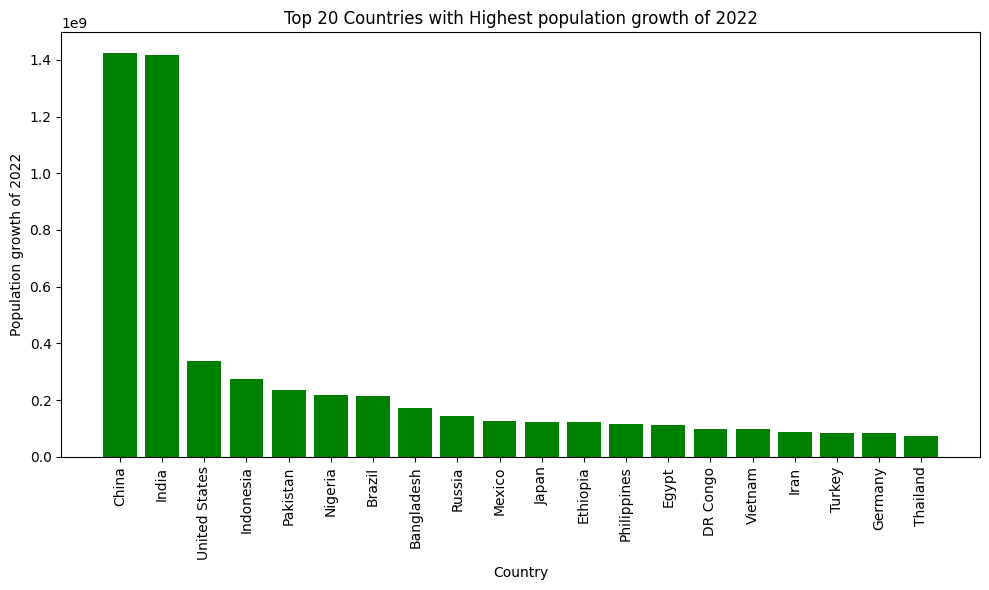

In [11]:
import matplotlib.pyplot as plt

# Plotting the top 20 highest population growth of 2022
plt.figure(figsize=(10, 6))
plt.bar(top_20_population['Country'], top_20_population['Population_2022'], color='green')
plt.xlabel('Country')
plt.ylabel('Population growth of 2022')
plt.title('Top 20 Countries with Highest population growth of 2022')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [12]:
# Sort the DataFrame by 'Predicted_Growth' column in descending order
data_sorted = data.copy()  # Create a copy of the DataFrame to avoid modifying the original data
data_sorted['Predicted_Growth'] = data_sorted['Predicted_Growth'].str.replace(',', '').astype(float)  # Remove commas and convert to float
data_sorted = data_sorted.sort_values(by='Predicted_Growth', ascending=False)

# Select the top 20 rows with highest predicted growth
top_20_predicted_growth = data_sorted.head(20)

# Print the top 20 highest predicted growth values
print("Top 20 Countries with Highest Predicted Growth:")
for index, row in top_20_predicted_growth.iterrows():
    print(f"{row['Country']}: {row['Predicted_Growth']:.0f}")  # Format to remove decimal places


Top 20 Countries with Highest Predicted Growth:
India: 1428652276
China: 1425602160
United States: 339981306
Indonesia: 277540049
Pakistan: 240494194
Nigeria: 223808055
Brazil: 216433128
Bangladesh: 172949592
Russia: 144438359
Mexico: 128460406
Ethiopia: 126526112
Japan: 123294748
Philippines: 117338618
Egypt: 112721549
DR Congo: 102267648
Vietnam: 98854527
Iran: 89170424
Turkey: 85819152
Germany: 83294810
Thailand: 71804576


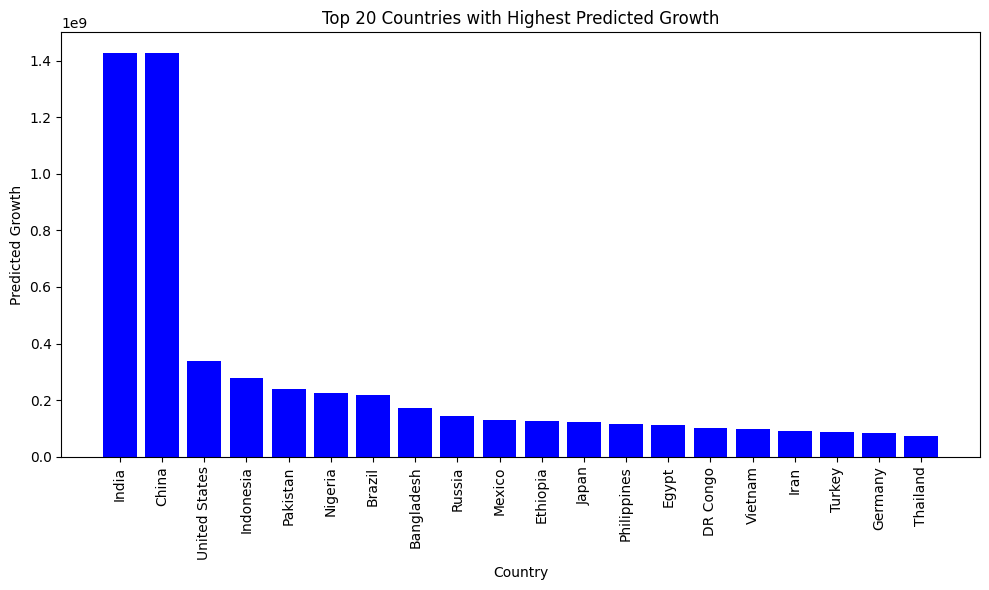

In [13]:
import matplotlib.pyplot as plt

# Plotting the top 20 highest predicted growth values
plt.figure(figsize=(10, 6))
plt.bar(top_20_predicted_growth['Country'], top_20_predicted_growth['Predicted_Growth'], color='blue')
plt.xlabel('Country')
plt.ylabel('Predicted Growth')
plt.title('Top 20 Countries with Highest Predicted Growth')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:
# Remove commas from 'Predicted_Growth' column and convert it to numeric
data['Predicted_Growth'] = data['Predicted_Growth'].str.replace(',', '').astype(float)

# Sort the DataFrame by 'Predicted_Growth' column in descending order
data_sorted = data.sort_values(by='Predicted_Growth', ascending=False)

# Reassign the rank values based on the sorted order
data_sorted['Rank'] = range(1, len(data_sorted) + 1)

# Print the rearranged DataFrame with rank based on predicted growth
print(data_sorted[['Rank', 'Country', 'Predicted_Growth']])


     Rank           Country  Predicted_Growth
1       1             India      1.428652e+09
0       2             China      1.425602e+09
2       3     United States      3.399813e+08
3       4         Indonesia      2.775400e+08
4       5          Pakistan      2.404942e+08
..    ...               ...               ...
229   230        Montserrat      4.386000e+03
230   231  Falkland Islands      3.791000e+03
231   232              Niue      1.935000e+03
232   233           Tokelau      1.893000e+03
233   234      Vatican City      5.180000e+02

[234 rows x 3 columns]


In [15]:
# Create a new DataFrame with rearranged columns
up_dataset = data_sorted[['Rank', 'Country', 'Predicted_Growth']].copy()

# Print the new dataset
print(up_dataset)


     Rank           Country  Predicted_Growth
1       1             India      1.428652e+09
0       2             China      1.425602e+09
2       3     United States      3.399813e+08
3       4         Indonesia      2.775400e+08
4       5          Pakistan      2.404942e+08
..    ...               ...               ...
229   230        Montserrat      4.386000e+03
230   231  Falkland Islands      3.791000e+03
231   232              Niue      1.935000e+03
232   233           Tokelau      1.893000e+03
233   234      Vatican City      5.180000e+02

[234 rows x 3 columns]


In [16]:
excel_file_path = 'Output_column.xlsx'  # Provide the desired file path
up_dataset.to_excel(excel_file_path, index=False)
print(f"DataFrame exported to Excel file: {excel_file_path}")

DataFrame exported to Excel file: Output_column.xlsx
